In [2]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
# Set your username and token here!
username = 'shreyajo'
token = '6cfe8f04b5424355'

# Set the datastream and start/enddates
datastream = 'bnfaoscaps3wM1.b1'
startdate = '2025-05-08'
enddate = '2025-05-11T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_caps = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaossmpsM1.b1'
result_smps = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaosnephdryM1.b1'
result_neph = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

# Set the datastream and start/enddates
datastream = 'bnfmetM1.b1'
result_met = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaoppsap1flynn1mM1.c1'
result_psap = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

datastream = 'bnfaossp2xrM1.b1'
result_sp2 = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)


[DOWNLOADING] bnfaoscaps3wM1.b1.20250510.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250509.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250511.000000.nc
[DOWNLOADING] bnfaoscaps3wM1.b1.20250508.000000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Sedlacek, A., & Smith, S. Cavity Attenuated Phase Shift Extinction
Monitor (AOSCAPS3W), 2025-05-08 to 2025-05-11, Bankhead National Forest, AL,
USA; Long-term Mobile Facility (BNF), Bankhead National Forest, AL, AMF3 (Main
Site) (M1). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1406888

[DOWNLOADING] bnfaossmpsM1.b1.20250508.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250509.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250511.000459.nc
[DOWNLOADING] bnfaossmpsM1.b1.20250510.000459.nc

If you use these data to prepare a publication, please cite:

Kuang, C., Singh, A., Howie, J., Salwen, C., & Hayes, C. Scanning mobility
particle sizer (AOSSMPS), 2025-05-08 to 2025-05-11, Bankhead Nat

In [4]:


# Let's read in the data using ACT and check out the data
ds_caps_org = act.io.read_arm_netcdf(result_caps)
ds_smps = act.io.read_arm_netcdf(result_smps)
ds_neph_org = act.io.read_arm_netcdf(result_neph)
ds_sp2_org = act.io.read_arm_netcdf(result_sp2)
ds_psap_org = act.io.read_arm_netcdf(result_psap)

# We can see that there's some missing data in the plot above so let's take a look at the embedded QC!
# First, for many of the ACT QC features, we need to get the dataset more to CF standard and that
# involves cleaning up some of the attributes and ways that ARM has historically handled QC
ds_caps_org.clean.cleanup()
ds_smps.clean.cleanup()
ds_neph_org.clean.cleanup()
ds_sp2_org.clean.cleanup()
ds_psap_org.clean.cleanup()


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [5]:
ds_caps_org = ds_caps_org.load().where(ds_caps_org.impactor_state == 1, drop=True)
ds_neph_org = ds_neph_org.load().where(ds_neph_org.impactor_state == 1, drop=True)
ds_psap_org = ds_psap_org.load().where(ds_psap_org.impactor_state == 1, drop=True)

ds_psap_org = ds_psap_org.load().where(ds_psap_org.impactor_state == 1, drop=True)


result_psap
#And plot again!
# Create a plotting display object with 2 plots
# Note we have to create a dictionary of datasets to pass in
ds_caps=ds_caps_org.resample(time='60min').mean()
ds_neph=ds_neph_org.resample(time='60min').mean()
ds_psap=ds_psap_org.resample(time='60min').mean()
ds_sp2=ds_sp2_org.resample(time='60min').mean()

(0.0, 300.0)

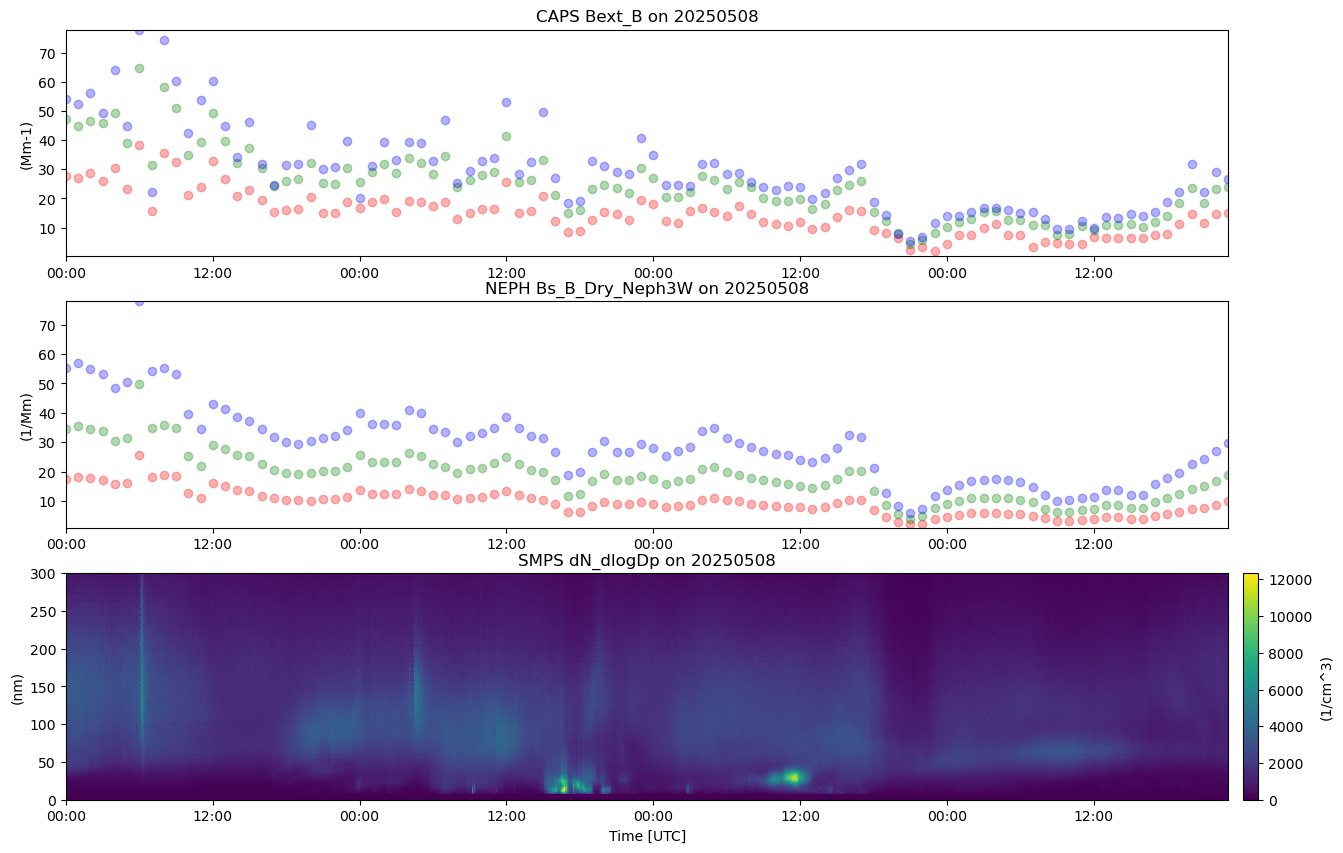

In [6]:



display = act.plotting.TimeSeriesDisplay({'CAPS': ds_caps, 'NEPH':ds_neph,'SMPS': ds_smps }, figsize=(15, 10), subplot_shape=(3,))



# Plot up the variable in the first plot
# Need to specify the dsname so it knows which dataset
# to use for this data.  This is helpful when datasets 
# have similar variable names
display.plot('Bext_R', dsname='CAPS', subplot_index=(0,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_G', dsname='CAPS', subplot_index=(0,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bext_B', dsname='CAPS', subplot_index=(0,),color='blue',marker='o', linestyle='none',alpha=0.3)


display.plot('Bs_R_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='red',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_G_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='green',marker='o', linestyle='none',alpha=0.3)
display.plot('Bs_B_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='blue',marker='o', linestyle='none',alpha=0.3)

# Plot up the MET btemperature and precipitation
display.plot('dN_dlogDp', dsname='SMPS', subplot_index=(2,))
display.axes[2,].set_ylim(0, 300)

In [7]:
dfNeph=ds_neph.to_dataframe()
dfCaps=ds_caps.to_dataframe()
dfPsap=ds_psap.to_dataframe()
dfSp2=ds_sp2.to_dataframe()

dfPsap.columns.values
dfPsap.columns.values


array(['impactor_state', 'Bs_B', 'qc_Bs_B', 'Bs_G', 'qc_Bs_G', 'Bs_R',
       'qc_Bs_R', 'AE_BG', 'qc_AE_BG', 'AE_BR', 'qc_AE_BR', 'AE_GR',
       'qc_AE_GR', 'Bbs_B', 'qc_Bbs_B', 'Bbs_G', 'qc_Bbs_G', 'Bbs_R',
       'qc_Bbs_R', 'AE_Bbs_BG', 'qc_AE_Bbs_BG', 'AE_Bbs_BR',
       'qc_AE_Bbs_BR', 'AE_Bbs_GR', 'qc_AE_Bbs_GR', 'bsf_B', 'qc_bsf_B',
       'bsf_G', 'qc_bsf_G', 'bsf_R', 'qc_bsf_R', 'g_B', 'qc_g_B', 'g_G',
       'qc_g_G', 'g_R', 'qc_g_R', 'Ba_B_combined', 'qc_Ba_B_combined',
       'Ba_G_combined', 'qc_Ba_G_combined', 'Ba_R_combined',
       'qc_Ba_R_combined', 'AAE_BG', 'qc_AAE_BG', 'AAE_BR', 'qc_AAE_BR',
       'AAE_GR', 'qc_AAE_GR', 'ssa_B', 'qc_ssa_B', 'ssa_G', 'qc_ssa_G',
       'ssa_R', 'qc_ssa_R', 'Ba_B_Virkkula', 'qc_Ba_B_Virkkula',
       'Ba_G_Virkkula', 'qc_Ba_G_Virkkula', 'Ba_R_Virkkula',
       'qc_Ba_R_Virkkula', 'ssa_B_Virkkula', 'qc_ssa_B_Virkkula',
       'ssa_G_Virkkula', 'qc_ssa_G_Virkkula', 'ssa_R_Virkkula',
       'qc_ssa_R_Virkkula', 'Ba_B_raw', 'qc_Ba_B_r

In [8]:

import pandas as pd
df_merged = pd.merge_asof(dfCaps, dfPsap,on='time', direction='nearest')

df_merged['SSA B']=df_merged['Bs_B_Dry_Neph3W']/df_merged['Bext_B']
df_merged['SSA R']=df_merged['Bs_R_Dry_Neph3W']/df_merged['Bext_R']
df_merged['SSA G']=df_merged['Bs_G_Dry_Neph3W']/df_merged['Bext_G']

df_merged['alphaRB']=-(np.log (df_merged['Bs_R_Dry_Neph3W']/df_merged['Bs_B_Dry_Neph3W'])/np.log (700/450))
df_merged['alphaBG']=-(np.log (df_merged['Bs_B_Dry_Neph3W']/df_merged['Bs_G_Dry_Neph3W'])/np.log (450/550))
df_merged['alphaGR']=-(np.log (df_merged['Bs_G_Dry_Neph3W']/df_merged['Bs_R_Dry_Neph3W'])/np.log (550/700))

df_merged['Abs_B']=df_merged['Bext_B']-df_merged['Bs_B_Dry_Neph3W']
df_merged['Abs_R']=df_merged['Bext_R']-df_merged['Bs_R_Dry_Neph3W']
df_merged['Abs_G']=df_merged['Bext_G']-df_merged['Bs_G_Dry_Neph3W']

df_merged['AAE_RB']=-(np.log (df_merged['Abs_R']/df_merged['Abs_B'])/np.log (700/450))
df_merged['AAE_BG']=-(np.log (df_merged['Abs_B']/df_merged['Abs_G'])/np.log (450/550))
df_merged['AAE_GR']=-(np.log (df_merged['Abs_G']/df_merged['Abs_R'])/np.log (550/700))

df_merged['Avg_SAE']=(df_merged['alphaRB']+df_merged['alphaBG']+df_merged['alphaGR'])/3
df_merged['Avg_SSA']=(df_merged['SSA B']+df_merged['SSA R']+df_merged['SSA G'])/3

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Mobility diameter (nm) dN/dlogDp')

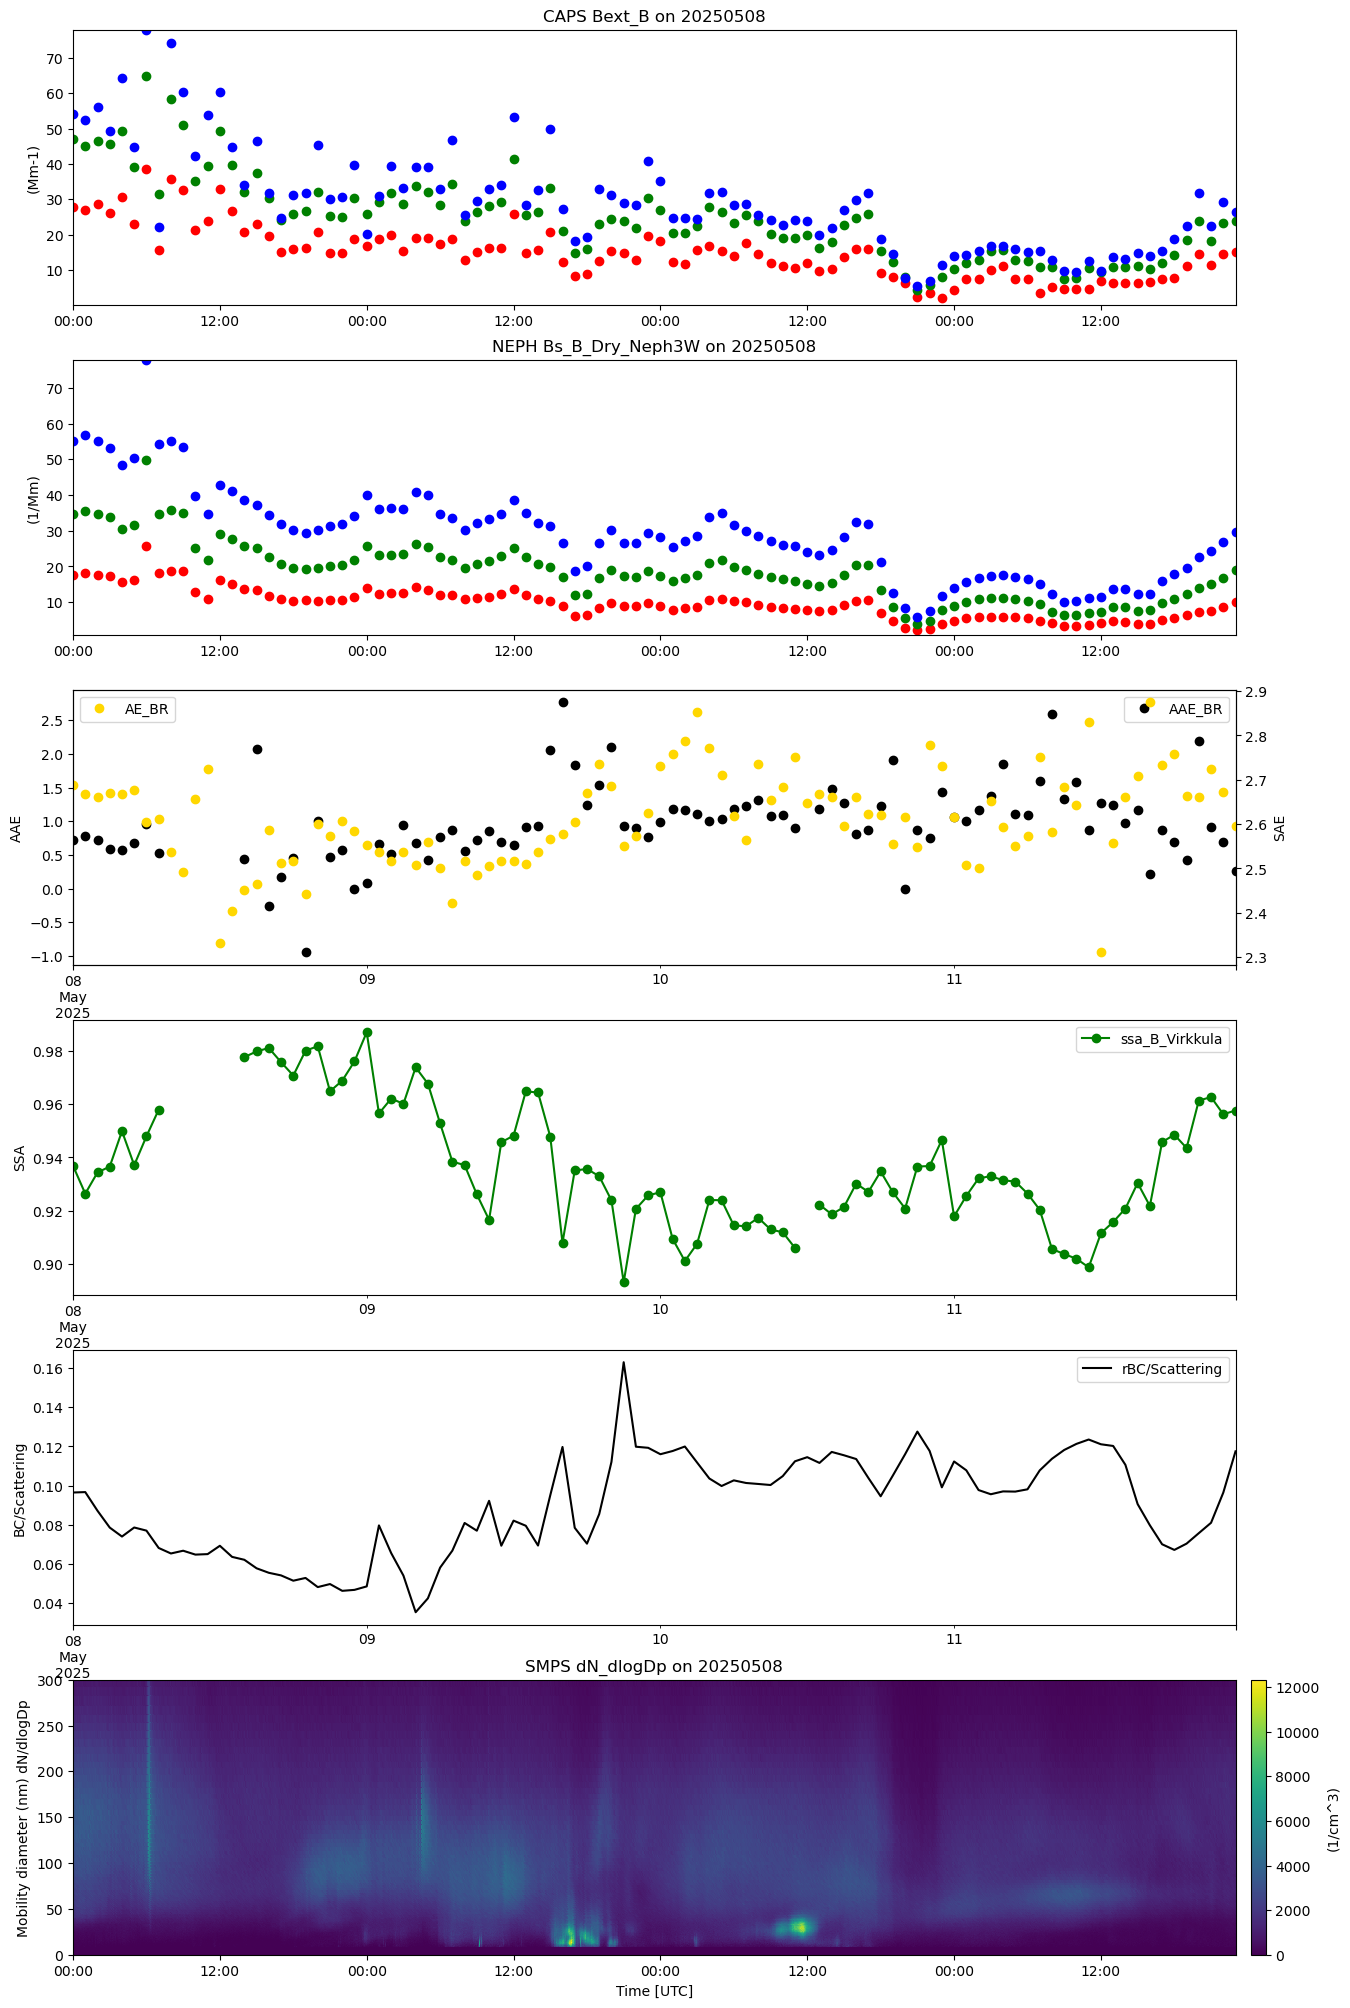

In [9]:


display = act.plotting.TimeSeriesDisplay({'CAPS': ds_caps, 'NEPH':ds_neph,'SMPS': ds_smps }, figsize=(15, 25), subplot_shape=(6,))



# Plot up the variable in the first plot
# Need to specify the dsname so it knows which dataset
# to use for this data.  This is helpful when datasets 
# have similar variable names
display.plot('Bext_R', dsname='CAPS', subplot_index=(0,),color='red',marker='o', linestyle='none',alpha=1)
display.plot('Bext_G', dsname='CAPS', subplot_index=(0,),color='green',marker='o', linestyle='none',alpha=1)
display.plot('Bext_B', dsname='CAPS', subplot_index=(0,),color='blue',marker='o', linestyle='none',alpha=1)

display.plot('Bs_R_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='red',marker='o', linestyle='none',alpha=1)
display.plot('Bs_G_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='green',marker='o', linestyle='none',alpha=1)
display.plot('Bs_B_Dry_Neph3W', dsname='NEPH', subplot_index=(1,),color='blue',marker='o', linestyle='none',alpha=1)

#display.axes[2,].plot(df_merged['time'],df_merged['SSA R'], color='red',marker='o', linestyle='none',alpha=0.3)
#display.axes[2,].plot(df_merged['time'],df_merged['SSA G'],color='green',marker='o', linestyle='none',alpha=0.3)
#display.axes[2,].plot(df_merged['time'],df_merged['SSA B'],color='blue',marker='o', linestyle='none',alpha=0.3)

#df_merged.plot(x='time',y='SSA R',ax=display.axes[2,],color='red',style='o')
##df_merged.plot(x='time',y='SSA B',ax=display.axes[2,],color='blue',style='o')
#df_merged.plot(x='time',y='SSA G',ax=display.axes[2,],color='green',style='o')


#display.axes[2,].set_ylabel('SSA')
#display.axes[2,].set_ylim(0.25, 1.5)


df_merged.plot(x='time',y='AAE_BR',ax=display.axes[2,],color='black',style='o')


display.axes[2,].set_ylabel('AAE')
twinx=display.axes[2,].twinx()
twinx.set_ylabel('SAE')
df_merged.plot(x='time',y='AE_BR',ax=twinx,color='gold',style='o')
#twinx.set_ylim(1.5, 3)



#df_merged.plot(x='time',y='AAE_RB',ax=display.axes[4,],color='red',style='o')
##df_merged.plot(x='time',y='AAE_BG',ax=display.axes[4,],color='blue',style='o')
#df_merged.plot(x='time',y='AAE_GR',ax=display.axes[4,],color='green',style='o')
#display.axes[4,].set_ylabel('AAE')
#display.axes[4,].set_ylim(0, 2)

df_merged.plot(x='time',y='ssa_B_Virkkula',ax=display.axes[3,],color='green',style='-o')
display.axes[3,].set_ylabel('SSA')

#display.axes[3,].set_ylim(0.6, 1)
#twin_ax.set_ylim(0, 1)
dfSp2 = pd.DataFrame({'time': ds_sp2['time'].values, 'rBC_particle_conc': ds_sp2['rBC_particle_conc'].values, 'scattering_particle_conc': ds_sp2['scattering_particle_conc'].values})
dfSp2['rBC/Scattering']=dfSp2['rBC_particle_conc']/dfSp2['scattering_particle_conc']


dfSp2.plot(x='time',y='rBC/Scattering', color='black', ax=display.axes[4,])
display.axes[4,].set_ylabel('BC/Scattering')


display.plot('dN_dlogDp', dsname='SMPS', subplot_index=(5,))
display.axes[5,].set_ylim(0, 300)
display.axes[5,].set_ylabel('Mobility diameter (nm) dN/dlogDp')

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

ds_caps_hr=ds_caps_org.resample(time='1min').mean()
ds_neph_hr=ds_neph_org.resample(time='1min').mean()
ds_psap_hr=ds_psap_org.resample(time='1min').mean()
ds_sp2_hr=ds_sp2_org.resample(time='1min').mean()


/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


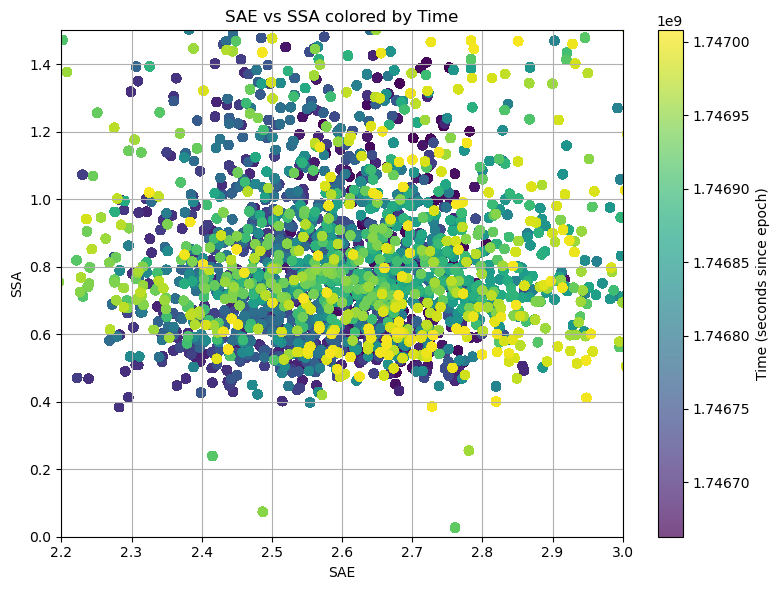

In [11]:

dfNephHr=ds_neph_hr.to_dataframe()
dfCapsHr=ds_caps_hr.to_dataframe()
dfPsapHr=ds_psap_hr.to_dataframe()
dfSp2Hr=ds_sp2_hr.to_dataframe()


import pandas as pd
df_merged_hr = pd.merge_asof(dfPsapHr, dfCapsHr, on='time', direction='nearest')
df_merged_hr = pd.merge_asof(dfSp2Hr, df_merged_hr, on='time', direction='nearest')

df_merged_hr['SSA B']=df_merged_hr['Bs_B_Dry_Neph3W']/df_merged_hr['Bext_B']
df_merged_hr['SSA R']=df_merged_hr['Bs_R_Dry_Neph3W']/df_merged_hr['Bext_R']
df_merged_hr['SSA G']=df_merged_hr['Bs_G_Dry_Neph3W']/df_merged_hr['Bext_G']

df_merged_hr['alphaRB']=-(np.log (df_merged_hr['Bs_R_Dry_Neph3W']/df_merged_hr['Bs_B_Dry_Neph3W'])/np.log (700/450))
df_merged_hr['alphaBG']=-(np.log (df_merged_hr['Bs_B_Dry_Neph3W']/df_merged_hr['Bs_G_Dry_Neph3W'])/np.log (450/550))
df_merged_hr['alphaGR']=-(np.log (df_merged_hr['Bs_G_Dry_Neph3W']/df_merged_hr['Bs_R_Dry_Neph3W'])/np.log (550/700))

df_merged_hr['Abs_B']=df_merged_hr['Bext_B']-df_merged_hr['Bs_B_Dry_Neph3W']
df_merged_hr['Abs_R']=df_merged_hr['Bext_R']-df_merged_hr['Bs_R_Dry_Neph3W']
df_merged_hr['Abs_G']=df_merged_hr['Bext_G']-df_merged_hr['Bs_G_Dry_Neph3W']

df_merged_hr['AAE_RB']=-(np.log (df_merged_hr['Abs_R']/df_merged_hr['Abs_B'])/np.log (700/450))
df_merged_hr['AAE_BG']=-(np.log (df_merged_hr['Abs_B']/df_merged_hr['Abs_G'])/np.log (450/550))
df_merged_hr['AAE_GR']=-(np.log (df_merged_hr['Abs_G']/df_merged_hr['Abs_R'])/np.log (550/700))

df_merged_hr['Avg_SAE']=(df_merged_hr['alphaRB']+df_merged_hr['alphaBG']+df_merged_hr['alphaGR'])/3
df_merged_hr['Avg_SSA']=(df_merged_hr['SSA B']+df_merged_hr['SSA R']+df_merged_hr['SSA G'])/3


df_merged_hr['SAE']=df_merged_hr['alphaRB']
df_merged_hr['SSA']=df_merged_hr['Avg_SSA']
# Example dataframe name: df_merged
# Columns: 'SAE', 'SSA', 'time'

# If time is not already datetime, convert it (optional but helps with color scaling)
#df_merged_hr['time'] = pd.to_datetime(df_merged_hr['time'])

# Convert time to numerical value for colormap (e.g., using timestamp)
df_merged_hr['time_numeric'] = df_merged_hr['time'].astype('int64') / 1e9  # seconds since epoch

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_merged_hr['SAE'], df_merged_hr['SSA'],
                      c=df_merged_hr['time_numeric'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Time (seconds since epoch)')
plt.ylim(0,1.5)
plt.xlim(2.2,3)
plt.xlabel('SAE')
plt.ylabel('SSA')
plt.title('SAE vs SSA colored by Time')
plt.grid(True)
plt.tight_layout()
plt.show()

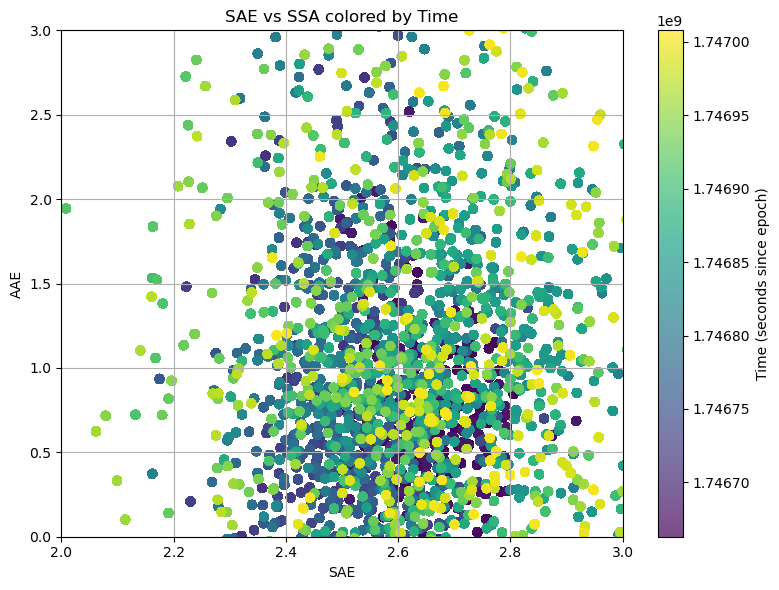

In [12]:

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_merged_hr['AE_BR'], df_merged_hr['AAE_BR'],
                      c=df_merged_hr['time_numeric'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Time (seconds since epoch)')
plt.ylim(0,3)
plt.xlim(2,3)
plt.xlabel('SAE')
plt.ylabel('AAE')
plt.title('SAE vs SSA colored by Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:


# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_merged_hr['rBC/Scattering'], df_merged_hr['ssa_B_Virkkula'],
                      c=df_merged_hr['time_numeric'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Time (seconds since epoch)')
plt.ylim(0,3)
plt.xlim(2,3)
plt.xlabel('BC/scattering')
plt.ylabel('SSA')
plt.title('BC vs SSA colored by Time')
plt.grid(True)
plt.tight_layout()